# Fysikklab TFY4106 og TFY4125 våren 2023.

Denne notebooken genererer en berg-og-dal-bane basert på koordinatene til åtte festepunkter med tildels 
tilfeldig valgte høyder. Baneformen $y(x)$ beregnes med funksjonen __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ består av ulike tredjegradspolynomer på deler av et intervall $[a,b]$, slik at $S$, $S' = dS/dx$ og $S'' = d^2S/dx^2$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

Dere skal deretter studere bevegelsen til ei lita kule som ruller på den genererte banen $y(x)$.
Dette blir temmelig enkelt ettersom kulas mekaniske energi (dvs summen av kinetisk og potensiell energi) er bevart 
når den ruller rent (dvs uten å gli). 

Skruehøydene genereres innenfor visse rammer som sørger for at 
<li> kula kommer seg gjennom hele banen, </li> 
<li> banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>
    
Det holder å kjøre dette programmet en gang for å oppnå en tilfredsstillende bane.
Når dere har gjort dette, er det viktig at dere skriver ned koordinatene til festepunktene! 
Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk på neste labøkt. Derfor er det viktig å notere nødvendig informasjon.
    

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi begynner med å importere noen nyttige bibliotek:

In [63]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)


Vi lager deretter en array med høydekoordinatene til festepunktene. 
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [64]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = yfast[0] - np.random.randint(40,60)
yfast[2] = yfast[1] - np.random.randint(70,90)
yfast[3] = yfast[2] + np.random.randint(-30,10)
yfast[4] = yfast[3] + np.random.randint(30,70)
yfast[5] = yfast[4] + np.random.randint(-20,20)
yfast[6] = yfast[5] - np.random.randint(40,80)
yfast[7] = yfast[6] + np.random.randint(-40,40)

#print(yfast)
Data = [300, 253, 182, 175, 205, 189, 123, 135]


Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene. 
Horisontal avstand mellom festepunktene er 200 mm.

In [65]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm 
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [66]:
cs = CubicSpline(xfast,Data,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [67]:
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)


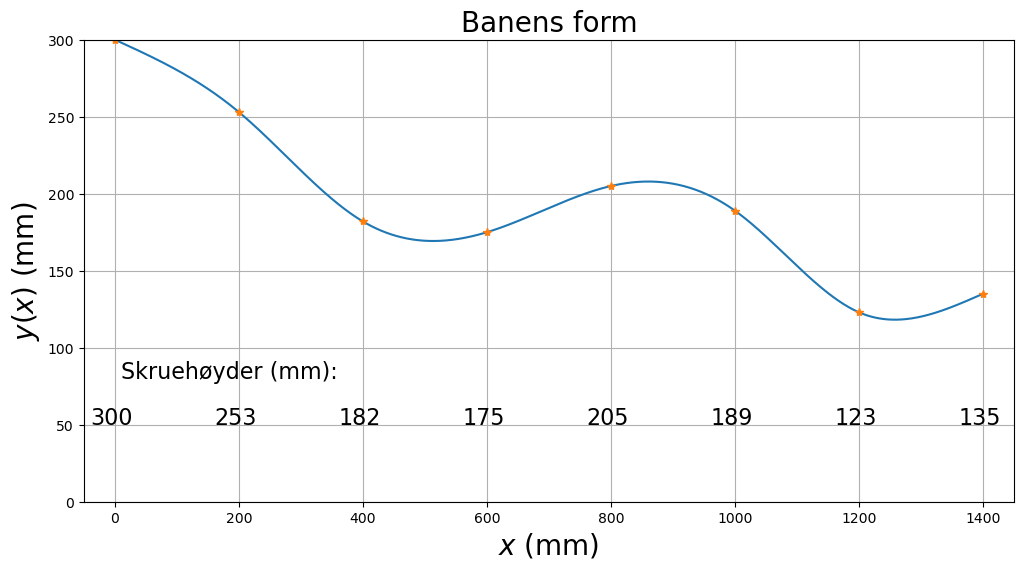

In [68]:
yfast = Data.copy()
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.savefig("Baneform", dpi = 600)
#Ta bort # hvis du ønsker å lagre grafen som pdf og/eller png.
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')

In [69]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Høyeste punkt etter 3.skrue (mm):  208
Laveste punkt etter 2.skrue (mm):  118
Starthelningsvinkel (grader): -10.4
Maksimal helningsvinkel (grader): 21.5
Minste krumningsradius (mm):  297
Festepunkthøyder (mm): [300, 253, 182, 175, 205, 189, 123, 135]


## Finn Farten til kulen:
Formel for rotasjonsenergi:
K = K_rot + K_trans
K = 1/2* I_0* w^2 + 1/2* M* V^2 der I_0 er den effektive massen og V er hastigheten til tyngdepunktet.
Det gir: 
M*g*h_0 = 1/2* I_0* w^2 + 1/2* M* V^2+ m*g*h
More TextIDK

1.5198252906682541


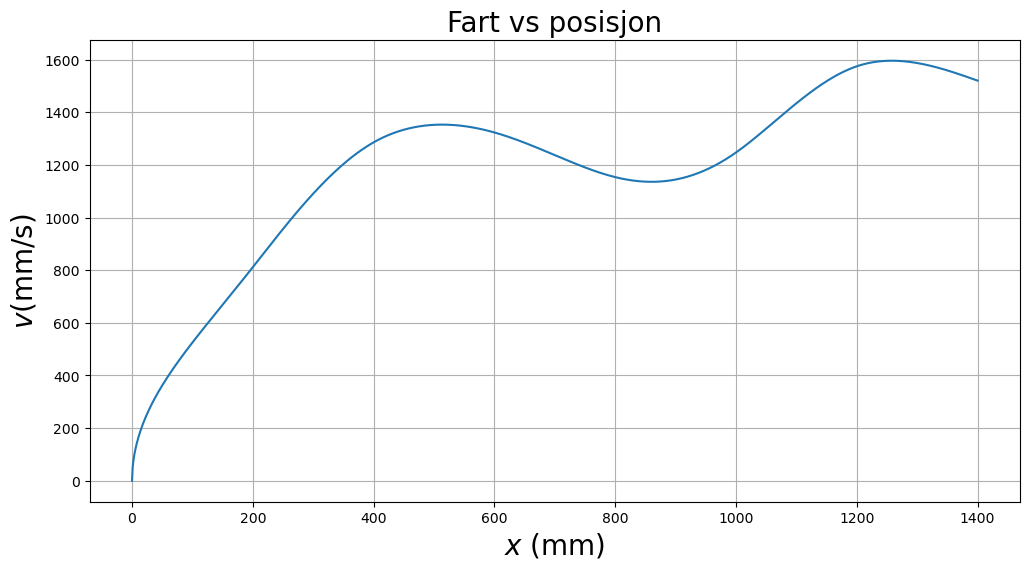

In [70]:
#importerer alt som er nødvendig så man ikke trenger å kjøre kode over dersom man kun vil jobbe her
import numpy as np
import matplotlib.pyplot as plt

def finn_farten(y):
    c = 2/5
    y0 = 300
    g = 9810
    v = np.sqrt(2*g*(y0-y)/(1+c))
    
    return v

def plot_fart(y):
    v = finn_farten(y)
    fart = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x, v)
    plt.title('Fart vs posisjon', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$v$(mm/s)',fontsize=20)
    plt.grid()
    plt.savefig("fart.png", dpi = 600)

print(finn_farten(cs(1401))/1000)
plot_fart(y)

## Finn den kinentiske energien

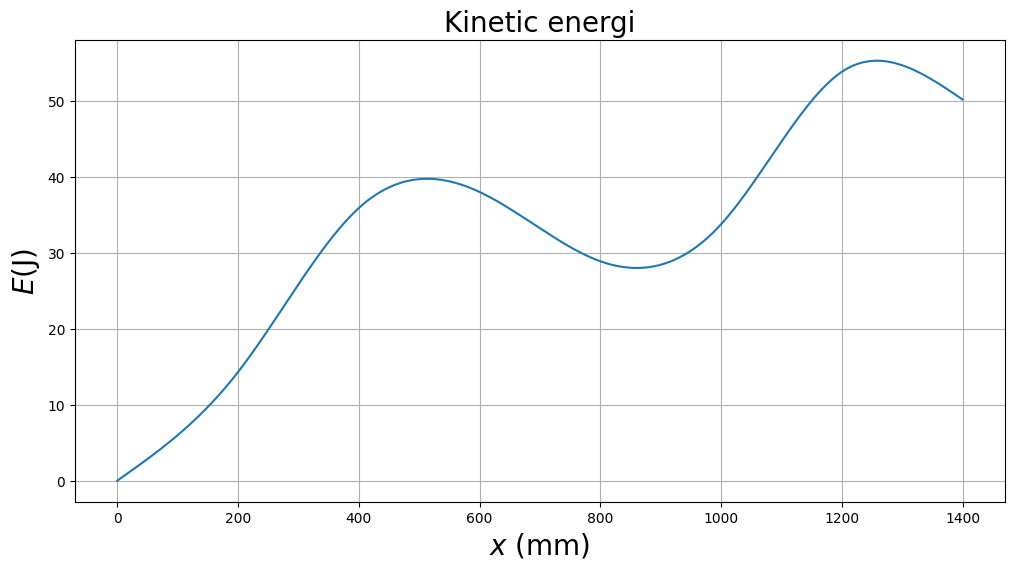

50.12415543716009


In [85]:
#importerer alt som er nødvendig så man ikke trenger å kjøre kode over dersom man kun vil jobbe her
import numpy as np
import matplotlib.pyplot as plt


#kinetisk energi er gitt som 1/2*mv**2
def simulert_kinetic(y):
    #Total kinetisk energi K er summen av transelasjonsenergi mv**2/2 og rotasjonsenergi c*m*v**2/2
    #E = U = m*g*y_0
    #Konstanter:
    m = 0.031 #kg
    r = 0.011 #m
    c = 2/5
    Kinetic = ((1+c)/2)*m*finn_farten(y)**2
    
    return Kinetic
    
def plot_kinetic(y): 
    Kinetic 
    kin = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x, Kinetic)
    plt.title('Kinetic energi', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$E$(J)',fontsize=20)
    plt.grid()
    
    plt.savefig("Kinetisk_energi", dpi =600)


plot_kinetic(y)
print((((1+2/5)/2)*0.031*(finn_farten(cs(1401))/1000)**2))


## Finn krumningen kappa og helningsvinkelen Beta

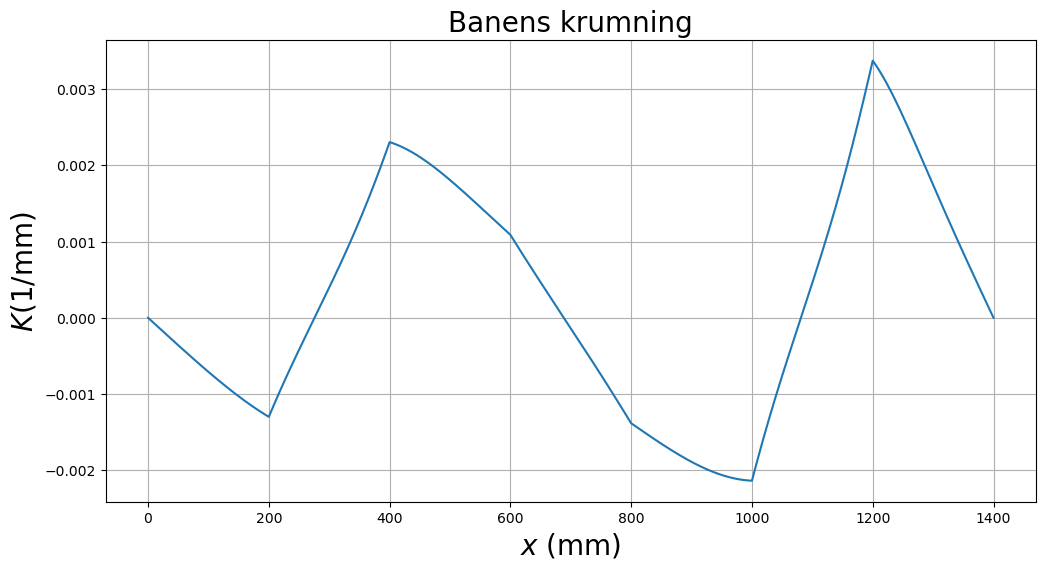

In [72]:
import numpy as np
import matplotlib.pyplot as plt

kappa = d2y/((1+(dy)**2)**(3/2))

Krumning = plt.figure('y(x)',figsize=(12,6))


plt.plot(x,kappa)
plt.title('Banens krumning', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$K$(1/mm)',fontsize=20)
plt.grid()
plt.show()

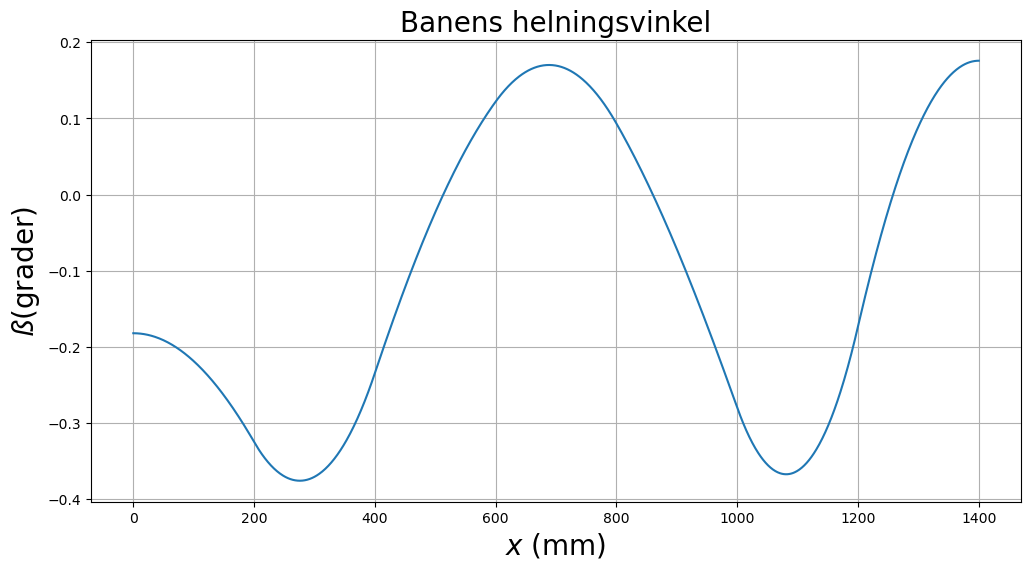

In [73]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.arctan(dy)

vinkel = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,beta)
plt.title('Banens helningsvinkel', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$ß$(grader)',fontsize=20)
plt.grid()
plt.show()

## Tid

In [74]:
import numpy as np
def finn_tid():
    delta_v_x = np.zeros(len(y))
    delta_t = np.zeros(len(y))
    V = finn_farten(y)
    t = np.zeros(len(y))
    for i in range(1,1401):
        delta_v_x[i] = 1/2* (V[i]-V[i-1])* np.cos(beta[i])
        delta_t[i] = 2* delta_v_x[i]/(V[i]+V[i-1])* np.cos(beta[i])
        t[i] = t[i-1]+delta_t[i]
    return t[i]

finn_tid()
    


2.569745721797162

## Normalkraft

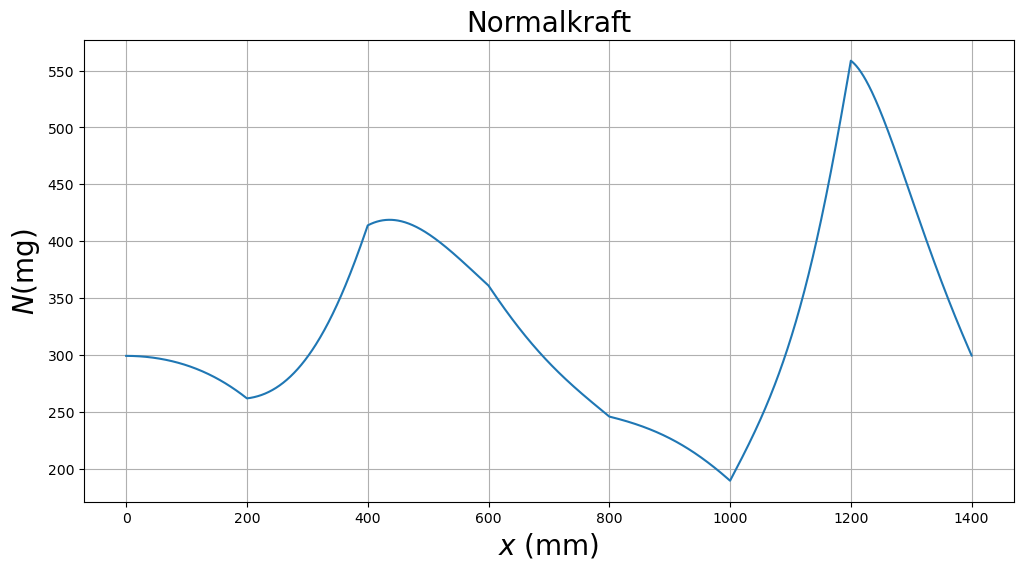

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def sentripetalakselerasjon():
    a_ = (finn_farten(y)**2)*kappa
    return a_



def normalKraft():
    g = 9810    
    m = 0.031
    N = m*(g*np.cos(beta)+sentripetalakselerasjon())
    return N
  

def plot_normalkraft():
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,normalKraft())
    plt.title('Normalkraft', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$N$(mg)',fontsize=20)
    plt.grid()
    plt.show()

plot_normalkraft()
  

## Friksjonskraft

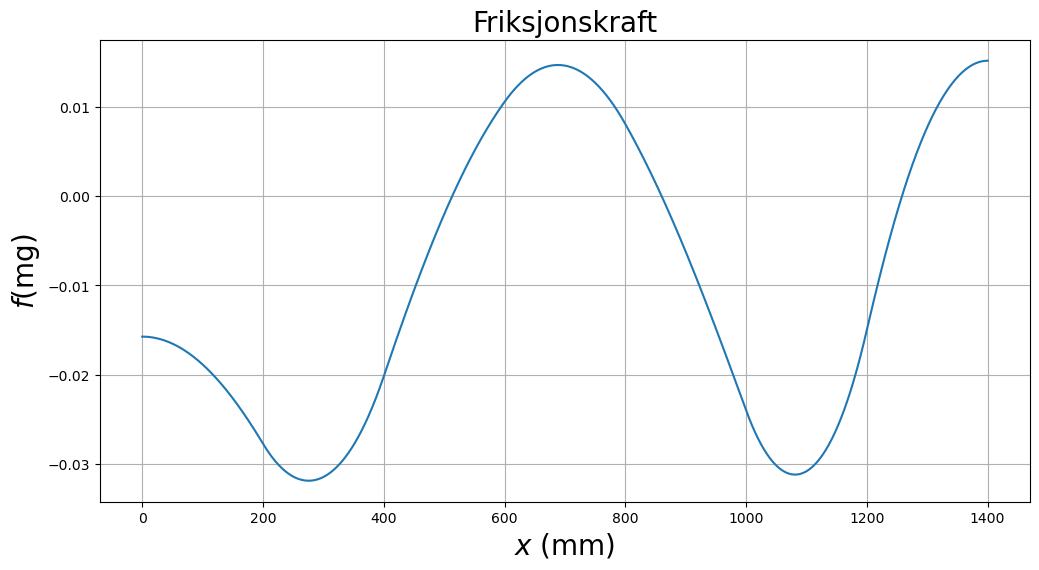

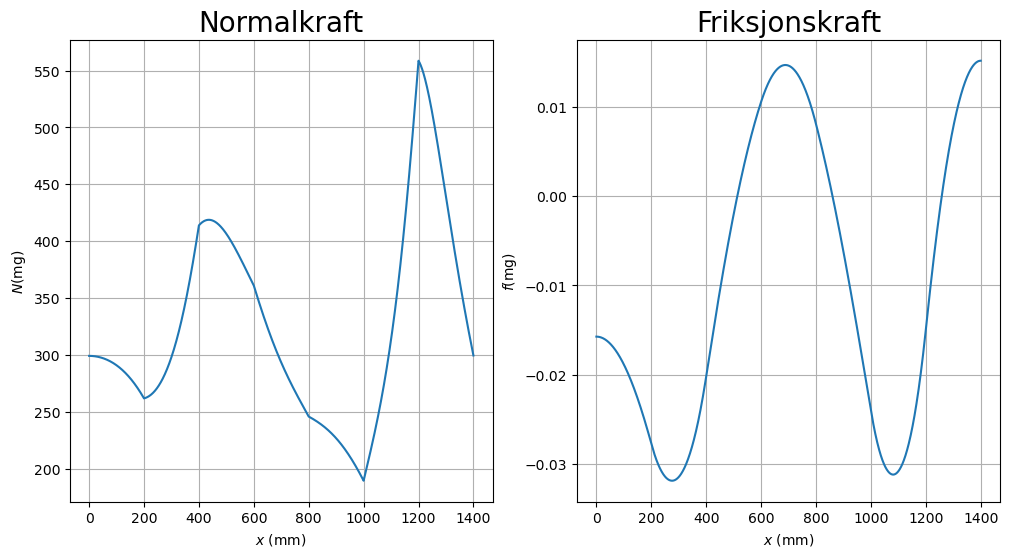

In [76]:
import numpy as np
def friksjon():
    #Konstanter
    c = 2/5
    m = 0.031 #kg
    g = 9810 #mm/s**2
    return (c/(1+c)*m*g*np.sin(beta))/1000

def plot_friksjon():
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,friksjon())
    plt.title('Friksjonskraft', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$f$(mg)',fontsize=20)
    plt.grid()
    plt.show()

plot_friksjon()

def plot_fric_and_norm():
    #plot friction and norm as two subplots next to eachother in one figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.plot(x,normalKraft())
    ax1.set_title('Normalkraft', fontsize=20)
    ax1.set_xlabel('$x$ (mm)',fontsize=10)
    ax1.set_ylabel('$N$(mg)',fontsize=10)
    ax1.grid()
    ax2.plot(x,friksjon())
    ax2.set_title('Friksjonskraft', fontsize=20)
    ax2.set_xlabel('$x$ (mm)',fontsize=10)
    ax2.set_ylabel('$f$(mg)',fontsize=10)
    ax2.grid()
    plt.savefig("Normalkraft_og_friksjonskraft", dpi = 600)
    
    
plot_fric_and_norm()

## Normalkraft / Friksjon

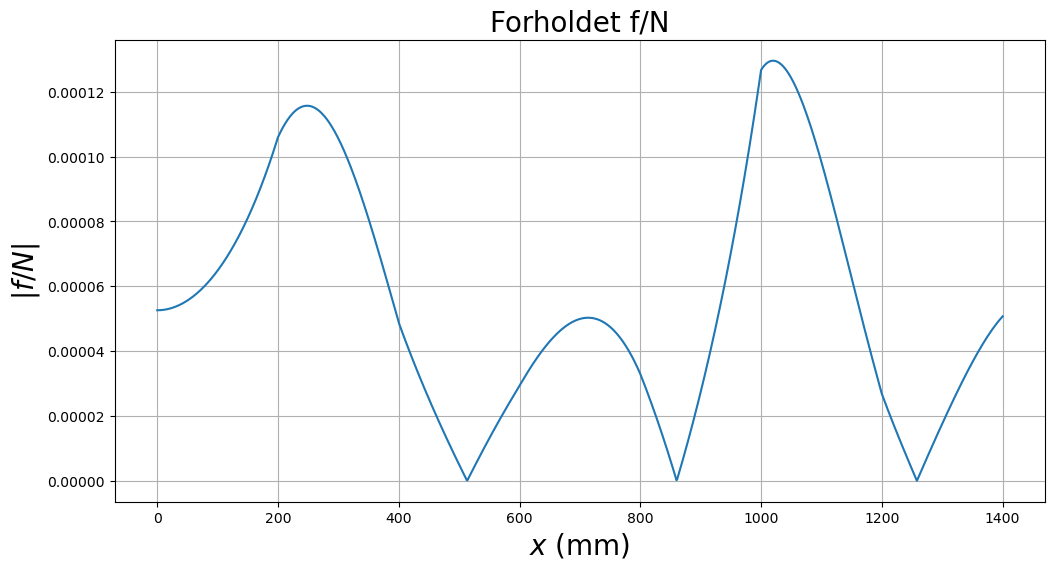

In [77]:
import numpy as np


def plot_NdF():
    F = friksjon()
    N = normalKraft()
    NF = np.abs(F/N)
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,NF)
    plt.title('Forholdet f/N', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$|f/N$|',fontsize=20)
    plt.grid()
    plt.show()

plot_NdF()


# Middelverdi

In [78]:
h_start = 0.287 #[m]

h_slutt = 0.155 #[m]

m_kule = 0.037 #[kg]

V_slutt = [1.391,1.377,1.35828 ,1.36367, 1.407, 1.361, 1.343, 1.345, 1.3435, 1.343, 1.339] #[m/s]

rulletid = [1.55, 1.54, 1.500, 1.5333, 1.500, 1.533, 1.500, 1.567, 1.533, 1.433] #[s]


def gjennomsnitt_rulletid():
    rulletid_sum = sum(rulletid)/len(rulletid)       
    return rulletid_sum

def gjennomsnitt_sluttfart():
    V_slutt_sum = sum(V_slutt)/len(V_slutt)        
    return V_slutt_sum

g = 9.81 #[m/s**2]
def tap_mekanisk_energi(): 
    Energi_sum = 0
    #finner gjennomsnittstap på de ti forsøkene
    
    for i in V_slutt:
        Energi_sum = h_start*g*m_kule - (i**2 * 0.5 * m_kule + m_kule*g*h_slutt)

    Energitap_gjennomsnitt = Energi_sum/10
    
    
    return Energitap_gjennomsnitt 

def tap_mekanisk_energi_liste():
    liste =[]
    for i in V_slutt:
        Energi_sum = h_start*g*m_kule - (i**2 * 0.5 * m_kule + m_kule*g*h_slutt)
        liste.append(Energi_sum)

    return liste 

print(gjennomsnitt_rulletid())
print(gjennomsnitt_sluttfart())
print(tap_mekanisk_energi())

1.51893
1.3610409090909092
0.0014743001499999992


# Total Kinetisk energi

In [79]:
def total_kinetisk():
    kin_sum = 0
    for i in V_slutt:
        m = 0.031 #[kg]
        r = 0.011
        c = 2/5 #[Geometrisk massefordelingskonstant]
        Kinetic = ((1+c)/2)*m*i**2 #[J]
        kin_sum =+ Kinetic

    kin_gjennomsnitt = kin_sum/len(V_slutt)

    return kin_gjennomsnitt

print(total_kinetisk())

0.0035369441545454543


# Standaravvik


In [80]:
def finn_standaravik(data):
    sum1 = 0
    for value in data:
        sum1 += (value - tap_mekanisk_energi())**2
    
    delta_X = np.sqrt(1/(len(data)-1) * sum1)
    return delta_X



## Standardfeil

In [81]:
def standarfeil(data):
    standarfeil = finn_standaravik(data)/np.sqrt(len(data))
    return standarfeil



# Eksprementiellt vs simulert


In [93]:
def view_diff():
    diff_list = []
    simulert_hatighet = finn_farten(y)[-1]/1000
    eksprementiell_hastighet = sum(V_slutt) / len(V_slutt)
   
    print(eksprementiell_hastighet)
    print(simulert_hatighet)
    
    diff_list.append(simulert_hatighet-eksprementiell_hastighet)
    
    simulert_rulletid = finn_tid()
    eksprementiell_rulletid = gjennomsnitt_rulletid()
    
    diff_list.append(simulert_rulletid-eksprementiell_rulletid)
    diff_list.append()
    
    
    return diff_list

print(f"Forskjell i hastighet: {view_diff()[0]} \nForskjell i rulletid {view_diff()[1]}\nForskjell i kinetisk energi {view_diff[2]}")


1.3610409090909092
1.5206436607098794
1.3610409090909092
1.5206436607098794
Forskjell i hastighet: 0.1596027516189702 
Forskjell i rulletid 1.0508157217971623
